In [3]:
import numpy as np
import pandas as pd
import os

# import matplotlib.pyplot as plt
import keras


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D, Reshape, LSTM, Lambda, Bidirectional
from keras.layers import Conv1D, MaxPooling1D, Embedding, Concatenate, AveragePooling1D, TimeDistributed
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, MaxPool2D, Conv2D
from keras.layers import GlobalMaxPooling2D, Conv3D, MaxPooling3D, ConvLSTM2D, Add, Dropout, Masking
from keras.models import Model
from keras.initializers import Constant
import tensorflow as tf




In [2]:
# !pip3 install --trusted-host files.pythonhosted.org --trusted-host pypi.org --trusted-host pypi.python.org contractions
# !pip3 install --trusted-host files.pythonhosted.org --trusted-host pypi.org --trusted-host pypi.python.org spacy
pip install contractions --user

In [10]:
import contractions

In [2]:
df = pd.read_csv('dev_sent_emo.csv')

In [3]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"


In [4]:
max(df.Utterance_ID.values)

22

In [5]:
df.Speaker.value_counts() # Total speakers 47

Ross                 217
Phoebe               185
Rachel               164
Joey                 149
Monica               137
Chandler             101
Frank                 17
Carol                 13
All                   10
Susan                 10
Dr. Long               8
Joanna                 7
Estelle                7
Tag                    7
Max                    5
Bob                    5
Kori                   4
Jen                    4
Whitney                4
Lauren                 4
Woman                  4
Janine                 4
Alice                  3
Kyle                   3
Ross and Rachel        3
The Hot Girl           3
Gary                   3
Waitress               2
Kate                   2
Guy                    2
Cliff                  2
Jeannine               2
TV Announcer           2
Dr. Harad              2
Ursula                 2
Carl                   1
Mark                   1
The Dry Cleaner        1
Cookie                 1
Stage Manager          1


In [6]:
df[(df.Dialogue_ID == 0) & (df.Utterance_ID == 0)][['Utterance', 'Utterance_ID', 'Speaker', 'Emotion', 'Sentiment']]

,Utterance,Utterance_ID,Speaker,Emotion,Sentiment
0,"Oh my God, hes lost it. Hes totally lost it.",0,Phoebe,sadness,negative


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Emotion"] = le.fit_transform(df["Emotion"]) #neutral = 4
                                              #surprise = 6
                                              #fear = 2
                                              #joy = 3
                                              #sadness = 5
                                              #disgust = 1
                                              #anger = 0
df["Sentiment"] = le.fit_transform(df["Sentiment"]) #negative = 0
                                                  #neutral = 1
                                                  #positive = 2
        
df["Speaker"] = le.fit_transform(df["Speaker"])

In [8]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, hes lost it. Hes totally lost it.",33,5,0,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,28,6,0,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",35,4,1,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,Youre a genius!,5,3,2,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we wont be bank buddies!",21,5,0,1,2,4,4,"00:12:34,211","00:12:37,505"


### contractions.add("y'know", 'you know')
### contractions.fix('Monica's')

### stemming and Lemma

In [11]:
#python wrapper to convert str type to str2 type
class str2(str):
    def __repr__(self):
        # Allow str.__repr__() to do the hard work, then
        # remove the outer two characters, single quotes,
        # and replace them with double quotes.
        return ''.join(('"', super().__repr__()[1:-1], '"'))

    
contractions.add("y'know", 'you know')    

##\x97\x92\x98\x85\x91  92-> ', 85-> <space>, 97-> <space>, 91 <space>

count = 0
for i in range(len(df.Utterance.values.tolist())):
    new_string = ''
    space_inserting_var = 1
    for word in df.Utterance.values.tolist()[i].replace("\x92", "'").replace("\x85", " ").replace("\x97", " ").replace("\x91", " ").split(" "):
        if space_inserting_var == 1:
            new_string = new_string + contractions.fix(str2(word))
            space_inserting_var = space_inserting_var + 1
        else:
            new_string = new_string + ' ' + contractions.fix(str2(word))
    print(new_string)
    df.Utterance.values[i] = new_string

Oh my God, he is lost it. he is totally lost it.
What?
Or! Or, we could go to the bank, close our accounts and cut them off at the source.
you are a genius!
Aww, man, now we will not be bank buddies!
Now, there is two reasons.
Hey.
Hey!
Ohh, you guys, remember that cute client I told you about? I bit him.
Where?!
On the touchy.
And
No, I know!
I-I am sorry, but the moment I touch him, I just want to throw out my old oath and take a new, dirty one.
Well, next time your massaging him, you should try and distract yourself.
Yeah! Yeah! Yeah! Like-like when I am doing something exciting and I do not want to get
Thank you, Joey.
No-no, thank you.
Hey Estelle, listen
Well! Well! Well! Joey Tribbiani! So you came back huh? They
What are you talkin' about? I never left you! you have always been my agent!
Really?!
Yeah!
Oh well, no harm, no foul.
Okay, you guys free tonight?
Yeah!!
Tonight? You-you did not say it was going to be at nighttime.
Yes? Yes?! How can I help you?
Yeah, we were we were 

### We can see max dialogues are 114. If we make utterances group of each dialogue (of 33), then the shape will be (114x33).

In [12]:
max(df.Dialogue_ID.values + 1)

114

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [14]:
# BASE_DIR = '/home/ankur/Datasets/'
# GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
# TEXT_DATA_DIR = 
MAX_UTTERANCE_LENGTH = 50  #Max sequence length paper is 69, average is 8.03
MAX_NUM_WORDS = 20000   #In paper 10,643
EMBEDDING_DIM = 300
# VALIDATION_SPLIT = 0.2

In [15]:
# finally, vectorize the text samples into a 2D integer tensor
# tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\x97\x92\x98\x85\x91')
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='"#%&()?!,*+-./:;\'<=>@[\\]^_`{|}~\t\n\x97\x92\x98\x85\x91')
tokenizer.fit_on_texts(df.Utterance.values)

In [19]:
# making utterances group of 33 => X_dev_data_groups is of shape (114, 33, 50)
X_dev_data_groups = np.zeros((114, 33, 50))
Y_dev_data_groups_emotions = np.zeros((114, 33, 7))
Y_dev_data_groups_sentiments = np.zeros((114, 33, 3))
for did, uttid in zip(df.Dialogue_ID.values, df.Utterance_ID.values):
    X_dev_text_sequences = tokenizer.texts_to_sequences(df.Utterance[(df.Dialogue_ID == did) & (df.Utterance_ID ==  uttid)].values)
    print(did, " " + str(uttid), " " + str(X_dev_text_sequences), " emotion->" + str(df.Emotion[(df.Dialogue_ID == did) & (df.Utterance_ID ==  uttid)].values) + " sentiment->" + str(df.Sentiment[(df.Dialogue_ID == did) & (df.Utterance_ID ==  uttid)].values))
    X_dev_data_groups[did][uttid] = pad_sequences(X_dev_text_sequences, maxlen=MAX_UTTERANCE_LENGTH)
    #^ <------- This is the data to feed as input to the NN
    Y_dev_data_groups_emotions[did][uttid] = pad_sequences(to_categorical(df.Emotion[(df.Dialogue_ID == did) & (df.Utterance_ID ==  uttid)].values), 7, padding = 'post')
    Y_dev_data_groups_sentiments[did][uttid] = pad_sequences(to_categorical(df.Sentiment[(df.Dialogue_ID == did) & (df.Utterance_ID ==  uttid)].values), 3, padding = 'post')
    
#     print(Y_dev_data_groups_emotions[did][uttid])
#     print(Y_dev_data_groups_sentiments[did][uttid])


0  0  [[12, 25, 62, 35, 3, 316, 5, 35, 3, 218, 316, 5]]  emotion->[5] sentiment->[0]
0  1  [[15]]  emotion->[6] sentiment->[0]
1  0  [[94, 94, 16, 90, 51, 4, 6, 425, 317, 161, 655, 9, 318, 181, 199, 95, 6, 656]]  emotion->[4] sentiment->[1]
1  1  [[2, 11, 8, 426]]  emotion->[3] sentiment->[2]
1  2  [[427, 162, 68, 16, 42, 7, 52, 425, 657]]  emotion->[5] sentiment->[0]
1  3  [[68, 46, 3, 148, 658]]  emotion->[4] sentiment->[1]
1  4  [[38]]  emotion->[4] sentiment->[1]
1  5  [[38]]  emotion->[3] sentiment->[2]
1  6  [[182, 2, 99, 659, 10, 319, 660, 1, 267, 2, 48, 1, 320, 39]]  emotion->[4] sentiment->[1]
1  7  [[85]]  emotion->[6] sentiment->[0]
1  8  [[29, 6, 661]]  emotion->[4] sentiment->[1]
1  9  [[9]]  emotion->[4] sentiment->[1]
1  10  [[18, 1, 13]]  emotion->[6] sentiment->[0]
1  11  [[1, 1, 17, 78, 37, 6, 219, 1, 428, 39, 1, 23, 69, 4, 429, 49, 25, 268, 662, 9, 149, 8, 150, 663, 60]]  emotion->[0] sentiment->[0]
1  12  [[32, 269, 111, 45, 664, 39, 2, 107, 163, 9, 665, 321]]  emot

11  6  [[1, 13, 5, 3, 21, 6, 274, 37, 1]]  emotion->[4] sentiment->[1]
11  7  [[32, 15, 17, 1, 31, 4, 80, 93, 56, 207, 4, 344, 181, 133]]  emotion->[2] sentiment->[0]
11  8  [[80, 84, 4, 344, 84, 464, 465]]  emotion->[0] sentiment->[0]
11  9  [[466]]  emotion->[4] sentiment->[1]
11  10  [[467, 741, 2, 742, 28, 93, 30, 465, 1, 17, 7, 743, 4, 744, 84, 186]]  emotion->[0] sentiment->[0]
11  11  [[70, 7]]  emotion->[4] sentiment->[1]
11  12  [[76, 1, 745, 84, 186]]  emotion->[0] sentiment->[0]
12  0  [[58, 128, 36, 1, 82, 2, 43, 8, 468]]  emotion->[4] sentiment->[1]
12  1  [[27]]  emotion->[4] sentiment->[1]
12  2  [[15, 3, 31, 29]]  emotion->[4] sentiment->[1]
12  3  [[83, 30, 233, 144]]  emotion->[6] sentiment->[0]
12  4  [[12, 25, 62, 70, 41, 2, 208, 746, 9, 747, 44, 201, 2, 13, 3, 8, 469, 748]]  emotion->[5] sentiment->[0]
13  0  [[19, 2, 174, 4, 749, 144]]  emotion->[4] sentiment->[1]
13  1  [[1, 282, 96, 8, 117, 234, 28, 470]]  emotion->[0] sentiment->[0]
13  2  [[19, 19, 77, 29, 2, 

22  12  [[24, 21, 45, 193, 292, 2, 22, 142, 91, 44, 60, 12]]  emotion->[6] sentiment->[0]
22  13  [[822, 346, 823, 33, 8, 173, 824, 46, 33, 8, 193, 372, 26, 186, 16, 90, 22, 249, 133]]  emotion->[6] sentiment->[0]
23  0  [[88, 85, 3, 209]]  emotion->[4] sentiment->[1]
23  1  [[12, 5, 3, 282, 825, 826, 373, 28, 6, 276, 4, 827, 73, 15, 3, 236]]  emotion->[5] sentiment->[0]
23  2  [[25, 506, 1, 63, 25, 506, 3, 250, 3, 143, 130]]  emotion->[5] sentiment->[0]
23  3  [[12, 18, 70]]  emotion->[6] sentiment->[0]
23  4  [[76, 194, 30, 8, 361, 9, 9, 1, 17, 7, 60, 9, 828, 5, 3, 7, 8, 829, 9, 830, 831]]  emotion->[5] sentiment->[0]
23  5  [[12, 25, 62, 1, 14, 7, 145, 5, 12, 2, 832, 833]]  emotion->[6] sentiment->[0]
23  6  [[1, 17, 105, 507]]  emotion->[1] sentiment->[0]
23  7  [[1, 67, 834, 355, 5, 1, 67, 194, 9, 1, 41, 52, 49, 9, 56, 41, 56, 41, 82, 131, 508, 171, 9, 9, 56, 41, 52, 74, 2, 13, 66, 95, 84, 9, 1, 41, 63, 62, 25, 835, 3, 374]]  emotion->[5] sentiment->[0]
23  8  [[509, 38, 14, 2, 63

32  3  [[27]]  emotion->[4] sentiment->[1]
32  4  [[2, 380, 52, 8, 89, 894]]  emotion->[4] sentiment->[1]
32  5  [[528, 23, 8, 895]]  emotion->[4] sentiment->[1]
32  6  [[2, 11, 48, 896, 897, 898, 24, 2, 11, 29, 45, 125]]  emotion->[4] sentiment->[1]
32  7  [[5, 136, 90, 158, 8, 89, 353, 899]]  emotion->[4] sentiment->[1]
32  8  [[59, 2, 11, 900, 46, 11, 8, 350, 901, 4, 222, 177, 392]]  emotion->[4] sentiment->[1]
32  9  [[14, 181]]  emotion->[0] sentiment->[0]
32  10  [[153, 72, 11, 177, 2, 36, 14, 23, 131, 231, 902, 37, 21, 25, 903, 1, 22, 184, 10, 131, 26, 181, 11, 505, 904]]  emotion->[4] sentiment->[1]
32  11  [[32, 16, 11, 174, 4, 163, 175]]  emotion->[4] sentiment->[1]
32  12  [[19, 46, 3, 105, 905, 906, 2, 36, 907]]  emotion->[4] sentiment->[1]
32  13  [[19]]  emotion->[4] sentiment->[1]
33  0  [[15, 3, 236, 44, 214]]  emotion->[5] sentiment->[0]
33  1  [[12, 56, 908, 56, 108, 56, 33, 339, 4, 909]]  emotion->[4] sentiment->[1]
34  0  [[910, 2, 11, 174]]  emotion->[4] sentiment-

47  7  [[12, 1, 108, 2, 99, 55, 330, 21, 58, 555]]  emotion->[6] sentiment->[0]
47  8  [[5, 3, 7, 10, 556, 26, 554]]  emotion->[4] sentiment->[1]
47  9  [[92, 12]]  emotion->[6] sentiment->[0]
47  10  [[971, 260]]  emotion->[4] sentiment->[1]
48  0  [[85, 11, 16, 31, 4, 126, 8, 481, 89, 502]]  emotion->[4] sentiment->[1]
48  1  [[12, 12, 12, 1, 42, 40, 972, 137, 973]]  emotion->[3] sentiment->[2]
48  2  [[76, 35, 42, 13, 15, 4, 14, 12, 25, 62, 2, 11, 8, 426]]  emotion->[3] sentiment->[2]
48  3  [[12, 62, 12, 62, 5, 3, 974, 29, 557]]  emotion->[2] sentiment->[0]
48  4  [[109, 5, 109, 5]]  emotion->[4] sentiment->[1]
48  5  [[19]]  emotion->[4] sentiment->[1]
48  6  [[12]]  emotion->[6] sentiment->[0]
48  7  [[12, 5, 3, 23, 47, 8, 975, 21, 50, 228]]  emotion->[5] sentiment->[0]
49  0  [[195, 20, 3, 24, 45, 244]]  emotion->[0] sentiment->[0]
49  1  [[61, 61, 3, 20, 25, 244]]  emotion->[6] sentiment->[0]
49  2  [[66, 194, 115, 976, 28, 49, 26, 8, 389, 167, 2, 220, 392]]  emotion->[0] senti

61  2  [[38, 232, 15, 1, 17, 81, 133]]  emotion->[4] sentiment->[1]
61  3  [[15]]  emotion->[4] sentiment->[1]
61  4  [[1, 17, 588, 49, 6, 1066, 44, 301]]  emotion->[4] sentiment->[1]
61  5  [[182, 93, 1, 17, 24, 1067, 43, 2]]  emotion->[3] sentiment->[2]
62  0  [[24, 213, 20, 58, 20, 1068, 120, 147, 1, 67, 61, 61, 11, 2, 31, 4, 1069, 4, 126]]  emotion->[4] sentiment->[1]
62  1  [[157, 153, 1, 22, 91, 589, 8, 1070, 26, 54, 6, 371, 1, 13, 65, 178, 52, 227, 81, 20]]  emotion->[3] sentiment->[2]
62  2  [[12, 168, 200, 346, 32, 201, 30, 91, 81, 223, 1071]]  emotion->[6] sentiment->[2]
62  3  [[27, 157, 9, 1, 13, 1072, 1073, 3, 21, 46, 1074, 37, 56, 3, 24]]  emotion->[4] sentiment->[1]
62  4  [[12, 1, 13, 2, 13, 23, 23, 215, 48, 5, 3, 1075, 28, 143]]  emotion->[4] sentiment->[1]
62  5  [[12, 28, 101]]  emotion->[4] sentiment->[1]
63  0  [[9, 114, 16, 90, 22, 233, 98, 6, 1076, 4, 6, 1077, 44, 2, 21, 6, 590]]  emotion->[3] sentiment->[2]
63  1  [[74, 5, 23, 41, 7, 22, 91, 1078]]  emotion->[4]

72  6  [[18, 37, 2, 11, 611, 25, 1157]]  emotion->[0] sentiment->[0]
72  7  [[18, 1, 17, 7, 611, 5, 1, 17, 238, 5, 3, 185, 15]]  emotion->[0] sentiment->[0]
72  8  [[164, 2]]  emotion->[4] sentiment->[1]
72  9  [[2, 13, 1158, 26, 25, 155, 612, 108, 1, 33, 185]]  emotion->[0] sentiment->[0]
72  10  [[45, 155, 612, 33, 2]]  emotion->[0] sentiment->[0]
72  11  [[27, 32, 2, 13, 97, 2, 23, 103, 4, 163, 8, 89, 1159]]  emotion->[0] sentiment->[0]
72  12  [[66, 97, 1, 103, 4, 163, 8, 412, 603]]  emotion->[0] sentiment->[0]
72  13  [[53, 50]]  emotion->[0] sentiment->[0]
72  14  [[50]]  emotion->[0] sentiment->[0]
72  15  [[1160, 1161, 35, 1162, 331, 9, 66, 157, 46, 3, 8, 170, 613, 26, 39, 44, 8, 89, 1163, 9]]  emotion->[4] sentiment->[1]
72  16  [[140, 2, 51, 455, 98, 45, 1164, 1165, 37, 14, 7, 77, 576, 4, 28, 71, 360, 30, 368, 9, 1166, 26, 559, 2, 208]]  emotion->[0] sentiment->[0]
72  17  [[1167, 162, 21, 6, 193, 614, 1168]]  emotion->[4] sentiment->[1]
72  18  [[12, 140, 149, 129, 615]]  em

82  8  [[1, 546, 22, 4, 1, 1238, 4, 14, 5, 37, 1, 17, 6, 445]]  emotion->[0] sentiment->[0]
82  9  [[2, 13]]  emotion->[4] sentiment->[1]
82  10  [[46, 3, 8, 1239, 4, 61, 523, 406, 1, 36, 593, 199, 6, 504]]  emotion->[4] sentiment->[1]
82  11  [[571, 28]]  emotion->[4] sentiment->[1]
82  12  [[79, 430]]  emotion->[4] sentiment->[1]
82  13  [[1240, 1, 17, 595, 1, 184, 261, 1, 55, 105, 623, 43, 261]]  emotion->[3] sentiment->[2]
82  14  [[168]]  emotion->[6] sentiment->[2]
82  15  [[6, 120, 3, 5, 3, 143, 29, 6, 1241, 1242]]  emotion->[4] sentiment->[1]
82  16  [[6, 624, 65, 116, 6, 564, 106, 7, 13, 35, 178, 52, 622]]  emotion->[4] sentiment->[1]
82  17  [[5, 3, 6, 625, 21, 8, 1243, 626, 9, 415, 416, 160, 160, 30, 160]]  emotion->[4] sentiment->[1]
82  18  [[1, 17, 6, 625, 21, 626, 9, 415, 416, 160, 160, 30, 160]]  emotion->[0] sentiment->[0]
83  0  [[12, 64, 62, 59, 2, 69, 8, 117, 24, 192, 23, 51, 1244, 5]]  emotion->[0] sentiment->[0]
83  1  [[15, 3, 31, 29, 44, 2, 258, 71, 11, 2, 24, 1

97  9  [[10, 3, 8, 639, 363, 180, 107, 22, 8, 639]]  emotion->[3] sentiment->[2]
97  10  [[7, 60, 10, 36, 631, 29, 6, 519]]  emotion->[6] sentiment->[0]
97  11  [[32, 97, 5, 3, 24, 173, 76, 6, 180, 33, 640, 29, 641, 642]]  emotion->[3] sentiment->[2]
97  12  [[9, 3, 20, 21, 1336, 6, 180, 1337]]  emotion->[6] sentiment->[0]
97  13  [[18, 18, 10, 3, 6, 424, 43, 6, 1338]]  emotion->[4] sentiment->[1]
97  14  [[1, 14, 7, 69, 8, 424]]  emotion->[2] sentiment->[0]
97  15  [[32, 1339, 207, 8, 424, 37, 2, 22, 55, 60, 76, 6, 180, 3, 599, 29, 105, 643, 644, 645, 646]]  emotion->[4] sentiment->[1]
97  16  [[75, 8, 306, 6, 180, 33, 640, 29, 641, 642, 9, 105, 643, 644, 645, 646, 10, 41, 115, 217]]  emotion->[6] sentiment->[2]
97  17  [[19, 627, 2, 14, 7, 13, 159, 48, 6, 2, 30, 1340]]  emotion->[4] sentiment->[1]
97  18  [[38]]  emotion->[6] sentiment->[2]
97  19  [[190]]  emotion->[4] sentiment->[1]
97  20  [[1, 103, 4, 146, 4, 2]]  emotion->[3] sentiment->[2]
97  21  [[121, 15, 3, 73]]  emotion->[

In [17]:
# print(X_dev_data.shape)
# print(X_dev_data[986])
# print(df.Utterance.values[986])

In [21]:
dev_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(dev_word_index))

Found 1414 unique tokens.


In [24]:
# # Load pickle
import pickle

embedding_index_glove_300d = open("dev_text_embedding_index_glove_300d.pickle","rb")
X_dev_text_embedding_index_glove_300d = pickle.load(embedding_index_glove_300d)

In [25]:
 len(X_dev_text_embedding_index_glove_300d)

400000

In [26]:
#Create embedding_matrix
num_words = min(MAX_NUM_WORDS, len(dev_word_index) + 1)
X_dev_embedding_matrix = np.random.rand(num_words, EMBEDDING_DIM)
for word, i in dev_word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = X_dev_text_embedding_index_glove_300d.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-random uniformly initialized.
        X_dev_embedding_matrix[i] = embedding_vector
    else:
        print(word, i)

damnit 291
pheebs 352
progressionist 435
smiledon 679
whoah 822
  855
oww 920
tuschy 955
blargon 1016
yesss 1139
hmph 1187
muhawa 1197
porsching 1210
noooooo 1298
philange 1321
ooohhhh 1344
good 1400
 1405


In [27]:
num_words

1415

### Defining Model

In [ ]:
import keras.backend as K
filter_sizes = [3,4,5]
num_filters = 512

In [ ]:
embedding_layer = Embedding(num_words, EMBEDDING_DIM, embeddings_initializer=Constant(X_dev_embedding_matrix), input_length=MAX_UTTERANCE_LENGTH, trainable=True)
conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], EMBEDDING_DIM), padding='valid', kernel_initializer='normal', activation='relu')
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], EMBEDDING_DIM), padding='valid', kernel_initializer='normal', activation='relu')
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], EMBEDDING_DIM), padding='valid', kernel_initializer='normal', activation='relu')
maxpool_0 = MaxPool2D(pool_size=(MAX_UTTERANCE_LENGTH - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')
maxpool_1 = MaxPool2D(pool_size=(MAX_UTTERANCE_LENGTH - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')
maxpool_2 = MaxPool2D(pool_size=(MAX_UTTERANCE_LENGTH - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')
dense_func = Dense(100, activation='tanh', name="dense")
dense_final = Dense(units=7, activation='softmax')
reshape_func = Reshape((MAX_UTTERANCE_LENGTH, EMBEDDING_DIM, 1))

In [32]:
#sequence length = 33

### Helper Functions

In [33]:
def slicer(x, index):
    return x[:,K.constant(index, dtype='int32'),:]

def slicer_output_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 3  # batch, seq_len, sent_len
    new_shape = (shape[0], shape[2])
    return new_shape

def reshaper(x):
    return K.expand_dims(x, axis=3)

def flattener(x):
    x = K.reshape(x, [-1, x.shape[1]*x.shape[3]])
    return x

def flattener_output_shape(input_shape):
    shape = list(input_shape)
    new_shape = (shape[0], 3*shape[3])
    return new_shape

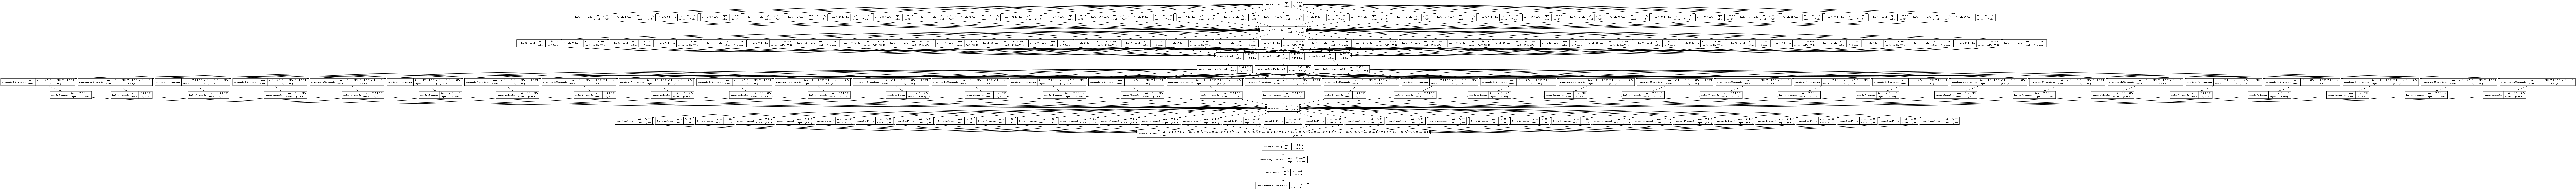

In [34]:
inputs = Input(shape=(33, MAX_UTTERANCE_LENGTH), dtype='int32')
cnn_output = []
for ind in range(33):
	
	local_input = Lambda(slicer, output_shape=slicer_output_shape, arguments={"index":ind})(inputs) # Batch, word_indices
	
	#cnn-sent
	emb_output = embedding_layer(local_input)
	reshape = Lambda(reshaper)(emb_output)
	concatenated_tensor = Concatenate(axis=1)([maxpool_0(conv_0(reshape)), maxpool_1(conv_1(reshape)), maxpool_2(conv_2(reshape))])
	flatten = Lambda(flattener, output_shape=flattener_output_shape,)(concatenated_tensor)
	dense_output = dense_func(flatten)
	dropout = Dropout(0.5)(dense_output)
	cnn_output.append(dropout)

def stack(x):
	return K.stack(x, axis=1)
cnn_outputs = Lambda(stack)(cnn_output)

masked = Masking(mask_value =0)(cnn_outputs)
lstm = Bidirectional(LSTM(300, activation='relu', return_sequences = True, dropout=0.3))(masked)
lstm = Bidirectional(LSTM(300, activation='relu', return_sequences = True, dropout=0.3), name="utter")(lstm)
output = TimeDistributed(Dense(7,activation='softmax'))(lstm)

model = Model(inputs, output)
tf.keras.utils.plot_model(model, to_file='test.png', show_shapes=True, show_layer_names=True)

In [35]:
Y_dev_data_groups_emotions.shape

(114, 33, 7)

In [36]:
X_dev_data_groups.shape

(114, 33, 50)

In [37]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', sample_weight_mode='temporal')

In [38]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_dev_data_groups, Y_dev_data_groups_emotions,
                epochs=50,
                batch_size=64,
                shuffle=True, 
                callbacks=[early_stopping],
                validation_split=0.1)